# Step by Step OCR
This notebook contains all steps of OCR

In [ ]:
pip install ocr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement ocr (from versions: none)
ERROR: No matching distribution found for ocr


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
sys.path.append('content/handwriting-ocr/src/ocr')
import tensorflow.compat.v1 as tf
tf.compat.v1.disable_v2_behavior()
tf.compat.v1.Session()

In [ ]:
!cp /content/drive/MyDrive/model/ocr-handwriting-models.zip /content/handwriting-ocr/models/archive.zip

cp: cannot stat '/content/drive/MyDrive/model/ocr-handwriting-models.zip': No such file or directory


In [ ]:
!unzip -q /content/handwriting-ocr/models/archive.zip -d /content/handwriting-ocr/models

unzip:  cannot find or open /content/handwriting-ocr/models/archive.zip, /content/handwriting-ocr/models/archive.zip.zip or /content/handwriting-ocr/models/archive.zip.ZIP.


In [ ]:
pip install simplejson

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.4/137.4 kB 12.4 MB/s eta 0:00:00


In [ ]:
pip install unidecode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 kB 17.3 MB/s eta 0:00:00


In [ ]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2

sys.path.append('/content/handwriting-ocr/src/ocr')
from ocr.normalization import word_normalization, letter_normalization
from ocr import page, words, characters
from ocr.helpers import implt, resize
from ocr.tfhelpers import Model
from ocr.datahelpers import idx2char

In [ ]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (15.0, 10.0)

### Global Variables

In [ ]:
IMG = '/content/handwriting-ocr/data/pages/test.jpg'    
LANG = 'en'


MODEL_LOC_CHARS = f'/content/handwriting-ocr/models/char-clas/{LANG}/CharClassifier'
MODEL_LOC_CTC = '/content/handwriting-ocr/models/word-clas/CTC/Classifier1'

## Load Trained Model

In [ ]:
CHARACTER_MODEL = Model(MODEL_LOC_CHARS)
CTC_MODEL = Model(MODEL_LOC_CTC, 'word_prediction')

## Load image

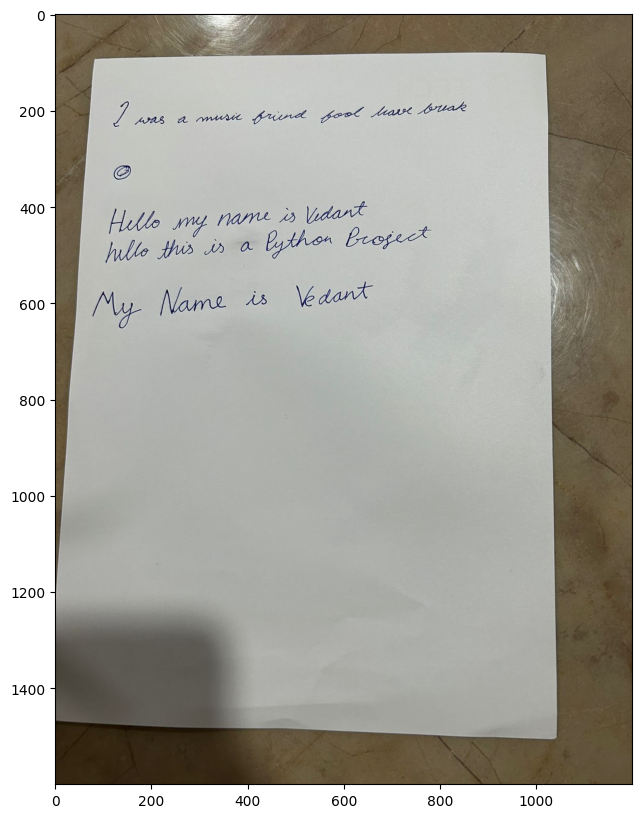

In [ ]:
image = cv2.cvtColor(cv2.imread(IMG), cv2.COLOR_BGR2RGB)
implt(image)

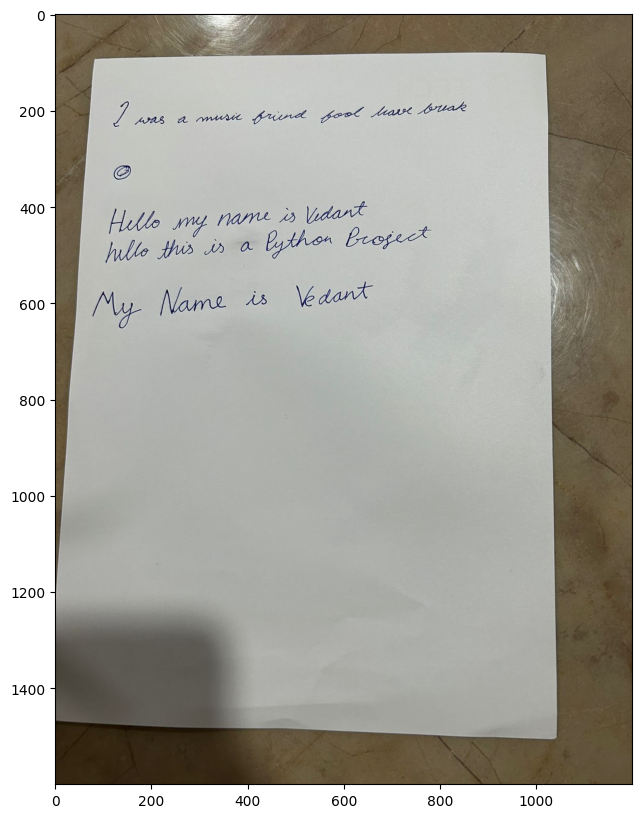

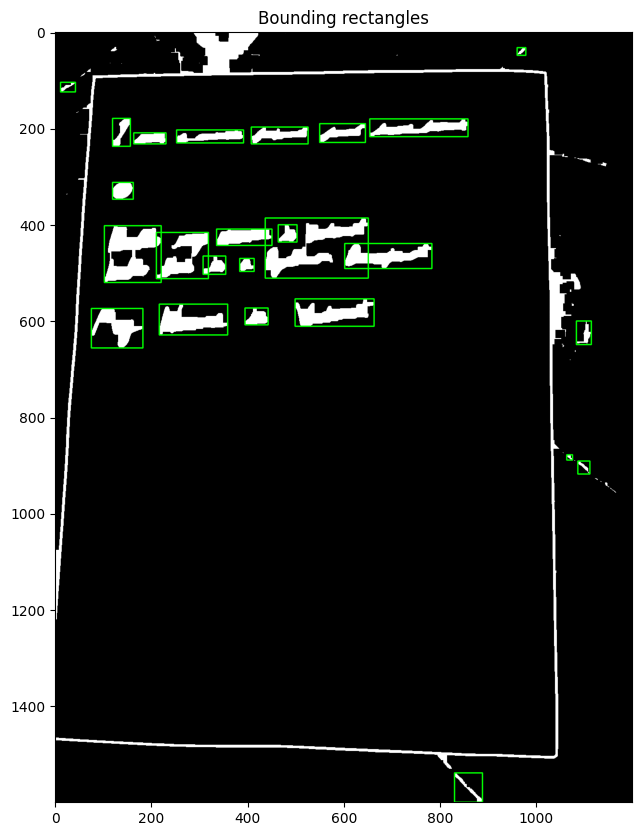

In [ ]:
# Crop image and get bounding boxes
crop = page.detection(image)
implt(crop)
boxes = words.detection(crop)
lines = words.sort_words(boxes)

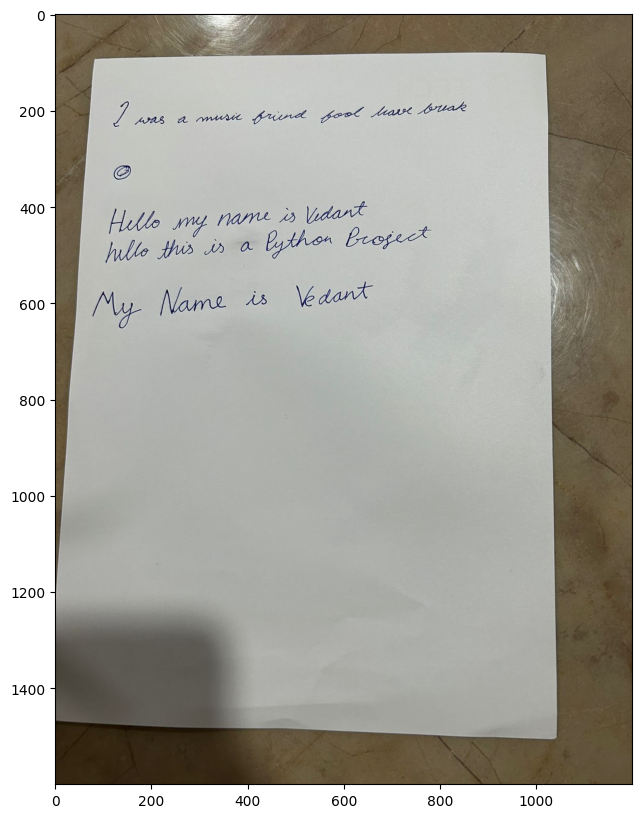

a
i
2 was amusie ariend bod uavebreat
o
Hhelo Unios name Eahawve is
is a biogect
My Name is Hedant 2
I s
I


In [ ]:
def recognise(img):
    """Recognising words using CTC Model."""
    img = word_normalization(
        img,
        64,
        border=False,
        tilt=False,
        hyst_norm=False)
    length = img.shape[1]
    # Input has shape [batch_size, height, width, 1]
    input_imgs = np.zeros(
            (1, 64, length, 1), dtype=np.uint8)
    input_imgs[0][:, :length, 0] = img

    pred = CTC_MODEL.eval_feed({
        'inputs:0': input_imgs,
        'inputs_length:0': [length],
        'keep_prob:0': 1})[0]

    word = ''
    for i in pred:
        word += idx2char(i + 1)
    return word

implt(crop)
for line in lines:
    print(" ".join([recognise(crop[y1:y2, x1:x2]) for (x1, y1, x2, y2) in line]))